In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bc = pd.read_csv('black_canyon_nurse_plants.csv', index_col=0)
cw = pd.read_csv('cottonwood_creek_nurse_plants.csv', index_col=0)
wb = pd.read_csv('wickenburg_nurse_plants.csv', index_col=0)
wt = pd.read_csv('white_tank_mtns_nurse_plants.csv', index_col=0)

In [3]:
print(bc.shape)
print(cw.shape)
print(wb.shape)
print(wt.shape)

(19530, 4)
(7560, 5)
(11901, 7)
(27799, 4)


In [4]:
bc['location'] = 'black canyon'

In [5]:
cw.rename(columns = {'plant_number' : 'sensor'}, inplace = True)

In [6]:
wb.drop(columns = ['month', 'day', 'hour'], inplace = True)

In [7]:
wb['location'] = 'wickenburg'

In [8]:
wt['location'] = 'White Tank Mountains'

In [9]:
cw = cw[['time', 'temp', 'sensor', 'plant', 'location']]

In [10]:
bc.columns

Index(['time', 'temp', 'sensor', 'plant', 'location'], dtype='object')

In [11]:
cw.columns

Index(['time', 'temp', 'sensor', 'plant', 'location'], dtype='object')

In [12]:
wb.columns

Index(['time', 'temp', 'sensor', 'plant', 'location'], dtype='object')

In [13]:
wt.columns

Index(['time', 'temp', 'sensor', 'plant', 'location'], dtype='object')

In [14]:
df = pd.concat([bc, cw, wb, wt])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66790 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      66790 non-null  object 
 1   temp      66790 non-null  float64
 2   sensor    66790 non-null  object 
 3   plant     66790 non-null  object 
 4   location  66790 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.1+ MB


In [16]:
cw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7560 entries, 0 to 839
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      7560 non-null   object 
 1   temp      7560 non-null   float64
 2   sensor    7560 non-null   object 
 3   plant     7560 non-null   object 
 4   location  7560 non-null   object 
dtypes: float64(1), object(4)
memory usage: 354.4+ KB


In [17]:
df.time = pd.to_datetime(df.time)

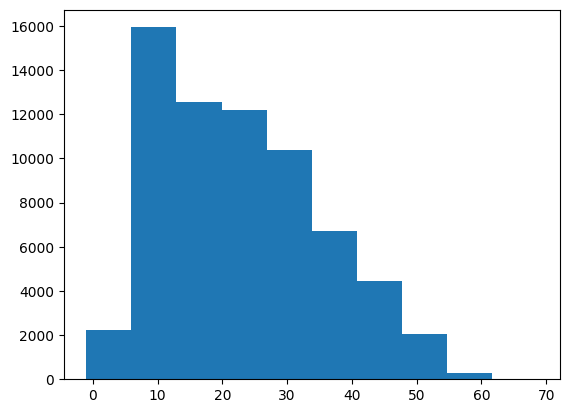

In [18]:
plt.hist(df.temp)
plt.show()

In [19]:
df.sensor.value_counts()

sensor
pv1                 4692
ltri1               4691
ltri3               4690
open3               4690
pv3                 4689
ltri2               4689
adelt1              4689
open2               4688
adelt2              4688
adelt3              4682
open1               2647
iw2                 1993
iw1                 1993
iw3                 1987
A. deltoidea 2       840
A. deltoidea 1       840
P. microphylla 3     840
A. deltoidea 3       840
P. microphylla 2     840
P. microphylla 1     840
open 3               840
open 2               840
open 1               840
pv2                  746
adelt4               745
open4                744
ltri4                744
pv4                  743
Name: count, dtype: int64

In [20]:
df.plant = df['plant'].replace({'pv' : 'P. microphylla',
                                'ltri' : 'L. tridentata', 
                                'adelt' : 'A. deltoidea'}) 

In [21]:
df.plant.value_counts()

plant
A. deltoidea      17324
open              15289
L. tridentata     14814
P. microphylla    13390
O. tesota          5973
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66790 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      66790 non-null  datetime64[ns]
 1   temp      66790 non-null  float64       
 2   sensor    66790 non-null  object        
 3   plant     66790 non-null  object        
 4   location  66790 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.1+ MB


In [23]:
df.head()

time  temp sensor plant      location
5 2023-01-02 16:00:00  13.4  open2  open  black canyon
6 2023-01-02 17:00:00  11.5  open2  open  black canyon
7 2023-01-02 18:00:00   9.9  open2  open  black canyon
8 2023-01-02 19:00:00   8.9  open2  open  black canyon
9 2023-01-02 20:00:00   8.3  open2  open  black canyon

In [24]:
df.to_csv('nurse_plant_temperatures_all_locations.csv')

In [25]:
df.plant.value_counts()

plant
A. deltoidea      17324
open              15289
L. tridentata     14814
P. microphylla    13390
O. tesota          5973
Name: count, dtype: int64